In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import *
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import numpy as np
import statsmodels.api as sm
from scipy.stats import gaussian_kde
from numpy import linspace

In [43]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df.csv")

   BMXWT  BMXHT  BMXWAIST  BMXHIP
0   57.9  168.2      68.0    66.6
1   34.0  145.4      60.6    67.4
2   52.5  169.3      68.0    68.7
3   31.6  138.5      62.9    69.1
4   30.7  140.5      59.2    69.7
5   29.4  141.3      55.2    69.9
6   36.5  150.5      59.8    69.9
7   31.4  134.0      59.4    70.0
8   29.2  137.5      56.4    70.1
9   35.2  144.8      64.7    70.5


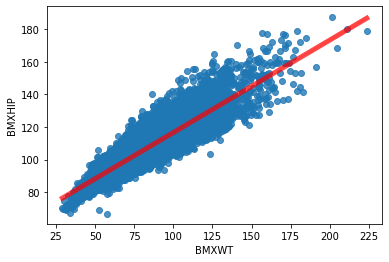

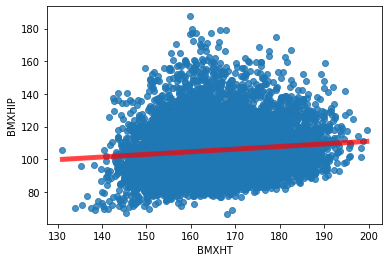

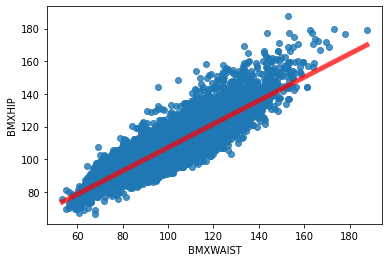

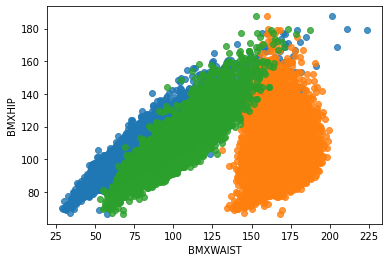

In [44]:
print(df.head(10))

sns.regplot(x=df["BMXWT"], y=df["BMXHIP"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

sns.regplot(x=df["BMXHT"], y=df["BMXHIP"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

sns.regplot(x=df["BMXWAIST"], y=df["BMXHIP"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

sns.regplot(x=df["BMXWT"], y=df["BMXHIP"], fit_reg=False)
sns.regplot(x=df["BMXHT"], y=df["BMXHIP"], fit_reg=False)
sns.regplot(x=df["BMXWAIST"], y=df["BMXHIP"], fit_reg=False)

In [45]:
#CC between Hip circumference and weight:
corr, _ = pearsonr(df["BMXHIP"], df["BMXWT"])
print('Pearsons correlation: %.3f' % corr)

#CC between Hip circumference and height:
corr, _ = pearsonr(df["BMXHIP"], df["BMXHT"])
print('Pearsons correlation: %.3f' % corr)

#CC between Hip circumference and Waist circumference:
corr, _ = pearsonr(df["BMXHIP"], df["BMXWAIST"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.879
Pearsons correlation: 0.108
Pearsons correlation: 0.876


In [46]:
#Regression Models:
y = df['BMXHIP']

[0.16065735]
78.90301226720597
0.011748382687132297
predicted response:
[105.9255779  102.2625904  106.10230098 ... 105.89344643 104.65638486
 104.59212192]
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           5.20e-27
Time:                        21:12:41   Log-Likelihood:                -40364.
No. Observations:                9803   AIC:                         8.073e+04
Df Residuals:                    9801   BIC:                         8.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t

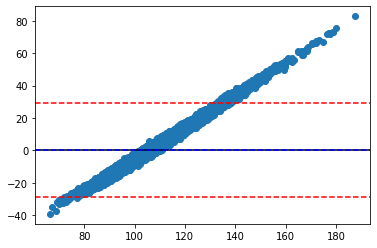

LOAA_1: 58.25142313805956


In [47]:
#Model 1
X1 = df[['BMXHT']]

model_1 = linear_model.LinearRegression()
model_1.fit(X1, y)

print(model_1.coef_)
print(model_1.intercept_)

r_sq_model_1 = model_1.score(X1, y)
print(r_sq_model_1)

y1_pred = model_1.predict(X1)
print('predicted response:', y1_pred, sep='\n')

X1a = sm.add_constant(X1)
model_1a = sm.OLS(y, X1a)

results_model_1a = model_1a.fit()
print(results_model_1a.summary())

#Residual Standard Error (RSE):
model_1a = sm.OLS(y, X1a).fit()
model_1a.resid.std(ddof=X1a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_1'] = 78.90301 + (0.16066*df['BMXHT'])
df['md_1'] = df['BMXHIP']-df['BMXHIP_1']
print(df.head(10))

df['mean_BMXHIP'] = statistics.mean(df['BMXHIP'])
df['sd_BMXHIP'] = statistics.stdev(df['BMXHIP'])
df['mean_BMXHIP_1'] = statistics.mean(df['BMXHIP_1'])
df['sd_BMXHIP_1'] = statistics.stdev(df['BMXHIP_1'])
df['mean_md_1'] = statistics.mean(df['md_1'])
df['sd_md_1'] = statistics.stdev(df['md_1'])

#Plot drawn:
print("Mean md_1:", statistics.mean(df['md_1']))
print("SD md_1: ", statistics.stdev(df['md_1']))
print("LLA: ", statistics.mean(df['md_1'])-(1.96*statistics.stdev(df['md_1'])))
print("ULA: ", statistics.mean(df['md_1'])+(1.96*statistics.stdev(df['md_1'])))

plt.plot( 'BMXHIP', 'md_1', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -0.00043955585024463647, color = 'blue', linestyle = '--')
plt.axhline(y = -29.126151124880025, color = 'red', linestyle = '--')
plt.axhline(y = 29.125272013179533, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_1 = 29.126151124880025 + 29.125272013179533
print("LOAA_1:" , LOAA_1)

[0.568801]
59.70975520832089
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 3.328e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:42   Log-Likelihood:                -33165.
No. Observations:                9803   AIC:                         6.633e+04
Df Residuals:                    9801   BIC:                         6.635e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.7098  

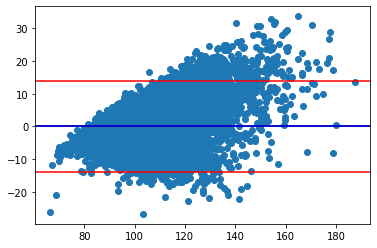

LOAA_2: 27.948858870439725


In [48]:
#Model 2
X2 = df[['BMXWT']]

model_2 = linear_model.LinearRegression()
model_2.fit(X2, y)

print(model_2.coef_)
print(model_2.intercept_)

#Add a constant:
X2a = sm.add_constant(X2)
model_2a = sm.OLS(y, X2a)

results_model_2a = model_2a.fit()
print(results_model_2a.summary())

#Residual Standard Error (RSE):
model_2a = sm.OLS(y, X2a).fit()
model_2a.resid.std(ddof=X2a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_2'] = 59.709755 + (0.568801*df['BMXWT'])
df['md_2'] = df['BMXHIP']-df['BMXHIP_2']
print(df.head(10))

df['mean_BMXHIP_2'] = statistics.mean(df['BMXHIP_2'])
df['sd_BMXHIP_2'] = statistics.stdev(df['BMXHIP_2'])
df['mean_md_2'] = statistics.mean(df['md_2'])
df['sd_md_2'] = statistics.stdev(df['md_2'])
print(df.head(10))

#Plot drawn:
print("Mean md_2:", statistics.mean(df['md_2']))
print("SD md_2: ", statistics.stdev(df['md_2']))
print("LLA: ", statistics.mean(df['md_2'])-(1.96*statistics.stdev(df['md_2'])))
print("ULA: ", statistics.mean(df['md_2'])+(1.96*statistics.stdev(df['md_2'])))

plt.plot( 'BMXHIP', 'md_2', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -6.812200491674594e-08, color = 'blue', linestyle = '-')
plt.axhline(y = -13.974429503341867, color = 'red', linestyle = '-')
plt.axhline(y = 13.974429367097859, color = 'red', linestyle = '-')
plt.show()

#Limits of Agreement amplitude:
LOAA_2 = 13.974429503341867 + 13.974429367097859
print("LOAA_2:" , LOAA_2)

[0.7164932]
35.593339970401516
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 3.240e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -33266.
No. Observations:                9803   AIC:                         6.654e+04
Df Residuals:                    9801   BIC:                         6.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5933

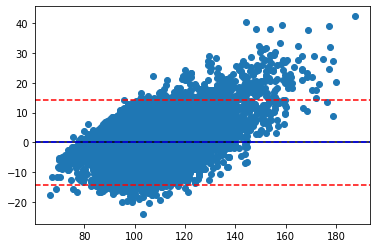

LOAA_3: 28.238535149650495


In [49]:
#Model 3
X3 = df[['BMXWAIST']]

model_3 = linear_model.LinearRegression()
model_3.fit(X3, y)

print(model_3.coef_)
print(model_3.intercept_)

#Add a constant:
X3a = sm.add_constant(X3)
model_3a = sm.OLS(y, X3a)

results_model_3a = model_3a.fit()
print(results_model_3a.summary())

#Residual Standard Error (RSE):
model_3a = sm.OLS(y, X3a).fit()
model_3a.resid.std(ddof=X3a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_3'] = 35.59334 + (0.71649*df['BMXWAIST'])
df['md_3'] = df['BMXHIP']-df['BMXHIP_3']
print(df.head(10))

df['mean_BMXHIP_3'] = statistics.mean(df['BMXHIP_3'])
df['sd_BMXHIP_3'] = statistics.stdev(df['BMXHIP_3'])
df['mean_md_3'] = statistics.mean(df['md_3'])
df['sd_md_3'] = statistics.stdev(df['md_3'])
print(df.head(10))

#Plot drawn:
print("Mean md_3:", statistics.mean(df['md_3']))
print("SD md_3: ", statistics.stdev(df['md_3']))
print("LLA: ", statistics.mean(df['md_3'])-(1.96*statistics.stdev(df['md_3'])))
print("ULA: ", statistics.mean(df['md_3'])+(1.96*statistics.stdev(df['md_3'])))

plt.plot( 'BMXHIP', 'md_3', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = 0.00031253381618476223, color = 'blue', linestyle = '--')
plt.axhline(y = -14.118955041009063, color = 'red', linestyle = '--')
plt.axhline(y = 14.119580108641433, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_3 = 14.118955041009063 + 14.119580108641433
print("LOAA_3:" , LOAA_3)

[ 0.66910558 -0.51843014]
137.92016401571618
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.303e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -30391.
No. Observations:                9803   AIC:                         6.079e+04
Df Residuals:                    9800   BIC:                         6.081e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

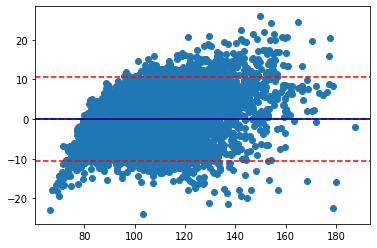

LOAA_4: 21.061097873329366


In [50]:
#Model 4
X4 = df[['BMXWT', 'BMXHT']]

model_4 = linear_model.LinearRegression()
model_4.fit(X4, y)

print(model_4.coef_)
print(model_4.intercept_)

#Add a constant:
X4a = sm.add_constant(X4)
model_4a = sm.OLS(y, X4a)

results_model_4a = model_4a.fit()
print(results_model_4a.summary())

#Residual Standard Error (RSE):
model_4a = sm.OLS(y, X4a).fit()
model_4a.resid.std(ddof=X4a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_4'] = 137.920164 + (-0.518439*df['BMXHT']) + (0.669106*df['BMXWT'])
df['md_4'] = df['BMXHIP']-df['BMXHIP_4']
print(df.head(10))

df['mean_BMXHIP_4'] = statistics.mean(df['BMXHIP_4'])
df['sd_BMXHIP_4'] = statistics.stdev(df['BMXHIP_4'])
df['mean_md_4'] = statistics.mean(df['md_4'])
df['sd_md_4'] = statistics.stdev(df['md_4'])
print(df.head(10))

#Plot drawn:
print("Mean md_4:", statistics.mean(df['md_4']))
print("SD md_4: ", statistics.stdev(df['md_4']))
print("LLA: ", statistics.mean(df['md_4'])-(1.96*statistics.stdev(df['md_4'])))
print("ULA: ", statistics.mean(df['md_4'])+(1.96*statistics.stdev(df['md_4'])))

plt.plot( 'BMXHIP', 'md_4', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = 0.0014407432010600173, color = 'blue', linestyle = '--')
plt.axhline(y = -10.529108193463623, color = 'red', linestyle = '--')
plt.axhline(y = 10.531989679865744, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_4 = 10.529108193463623 + 10.531989679865744
print("LOAA_4:" , LOAA_4)

[-0.09596471  0.72680568]
50.56186191985632
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.657e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:44   Log-Likelihood:                -33180.
No. Observations:                9803   AIC:                         6.637e+04
Df Residuals:                    9800   BIC:                         6.639e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

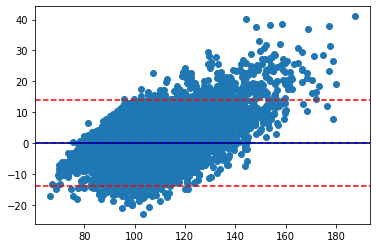

LOAA_5: 27.99228751475208


In [51]:
#Model 5
X5 = df[['BMXHT', 'BMXWAIST']]

model_5 = linear_model.LinearRegression()
model_5.fit(X5, y)

print(model_5.coef_)
print(model_5.intercept_)

#Add a constant:
X5a = sm.add_constant(X5)
model_5a = sm.OLS(y, X5a)

results_model_5a = model_5a.fit()
print(results_model_5a.summary())

#Residual Standard Error (RSE):
model_5a = sm.OLS(y, X5a).fit()
model_5a.resid.std(ddof=X5a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_5'] = 50.561862 + (-0.095965*df['BMXHT']) + (0.726806*df['BMXWAIST'])
df['md_5'] = df['BMXHIP']-df['BMXHIP_5']
print(df.head(10))

df['mean_BMXHIP_5'] = statistics.mean(df['BMXHIP_5'])
df['sd_BMXHIP_5'] = statistics.stdev(df['BMXHIP_5'])
df['mean_md_5'] = statistics.mean(df['md_5'])
df['sd_md_5'] = statistics.stdev(df['md_5'])
print(df.head(10))

#Plot drawn:
print("Mean md_5:", statistics.mean(df['md_5']))
print("SD md_5: ", statistics.stdev(df['md_5']))
print("LLA: ", statistics.mean(df['md_5'])-(1.96*statistics.stdev(df['md_5'])))
print("ULA: ", statistics.mean(df['md_5'])+(1.96*statistics.stdev(df['md_5'])))

plt.plot( 'BMXHIP', 'md_5', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = 1.7583862088800805e-05, color = 'blue', linestyle = '--')
plt.axhline(y = -13.99612617351395, color = 'red', linestyle = '--')
plt.axhline(y = 13.996161341238128, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_5 = 13.99612617351395 + 13.996161341238128
print("LOAA_5:" , LOAA_5)

[0.30742543 0.36559462]
45.073412271414156
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 2.079e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -32301.
No. Observations:                9803   AIC:                         6.461e+04
Df Residuals:                    9800   BIC:                         6.463e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

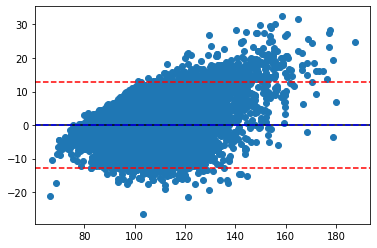

LOAA_6: 25.590466465490344


In [52]:
#Model 6
X6 = df[['BMXWT', 'BMXWAIST']]

model_6 = linear_model.LinearRegression()
model_6.fit(X6, y)

print(model_6.coef_)
print(model_6.intercept_)

#Add a constant:
X6a = sm.add_constant(X6)
model_6a = sm.OLS(y, X6a)

results_model_6a = model_6a.fit()
print(results_model_6a.summary())

#Residual Standard Error (RSE):
model_6a = sm.OLS(y, X6a).fit()
model_6a.resid.std(ddof=X6a.shape[1])

#Bland-Altman Plot:
df['BMXHIP_6'] = 45.073412 + (0.307425*df['BMXWT']) + (0.365595*df['BMXWAIST'])
df['md_6'] = df['BMXHIP']-df['BMXHIP_6']
print(df.head(10))

df['mean_BMXHIP_6'] = statistics.mean(df['BMXHIP_6'])
df['sd_BMXHIP_6'] = statistics.stdev(df['BMXHIP_6'])
df['mean_md_6'] = statistics.mean(df['md_6'])
df['sd_md_6'] = statistics.stdev(df['md_6'])
print(df.head(10))

#Plot drawn:
print("Mean md_6:", statistics.mean(df['md_6']))
print("SD md_6: ", statistics.stdev(df['md_6']))
print("LLA: ", statistics.mean(df['md_6'])-(1.96*statistics.stdev(df['md_6'])))
print("ULA: ", statistics.mean(df['md_6'])+(1.96*statistics.stdev(df['md_6'])))

plt.plot( 'BMXHIP', 'md_6', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -2.641691317246042e-06, color = 'blue', linestyle = '--')
plt.axhline(y = -12.79523587443649, color = 'red', linestyle = '--')
plt.axhline(y = 12.795230591053855, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_6 = 12.79523587443649 + 12.795230591053855
print("LOAA_6:" , LOAA_6)

[-0.48851763  0.617183    0.0645308 ]
130.8241119215765
                            OLS Regression Results                            
Dep. Variable:                 BMXHIP   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -30360.
No. Observations:                9803   AIC:                         6.073e+04
Df Residuals:                    9799   BIC:                         6.076e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

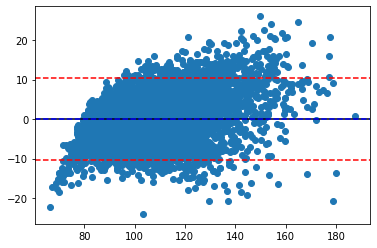

LOAA_7: 20.994278702107636


In [53]:
#Model 7
X7 = df[['BMXHT','BMXWT', 'BMXWAIST']]

model_7 = linear_model.LinearRegression()
model_7.fit(X7, y)

print(model_7.coef_)
print(model_7.intercept_)

#Add a constant:
X7a = sm.add_constant(X7)
model_7a = sm.OLS(y, X7a)

results_model_7a = model_7a.fit()
print(results_model_7a.summary())

#Residual Standard Error
model_7a = sm.OLS(y, X7a).fit()
model_7a.resid.std(ddof=X7a.shape[1])

#Bland_Altman Plot:
df['BMXHIP_7'] = 130.824112 + (-0.488518*df['BMXHT']) + (0.617183*df['BMXWT']) + (0.064531*df['BMXWAIST'])
df['md_7'] = df['BMXHIP']-df['BMXHIP_7']
print(df.head(10))

df['mean_BMXHIP_7'] = statistics.mean(df['BMXHIP_7'])
df['sd_BMXHIP_7'] = statistics.stdev(df['BMXHIP_7'])
df['mean_md_7'] = statistics.mean(df['md_7'])
df['sd_md_7'] = statistics.stdev(df['md_7'])
print(df.head(10))

#Plot drawn:
print("Mean md_7:", statistics.mean(df['md_7']))
print("SD md_7: ", statistics.stdev(df['md_7']))
print("LLA: ", statistics.mean(df['md_7'])-(1.96*statistics.stdev(df['md_7'])))
print("ULA: ", statistics.mean(df['md_7'])+(1.96*statistics.stdev(df['md_7'])))

plt.plot( 'BMXHIP', 'md_7', data=df, linestyle='none', marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -4.144073241301843e-05, color = 'blue', linestyle = '--')
plt.axhline(y = -10.497097910321404, color = 'red', linestyle = '--')
plt.axhline(y = 10.497180791786231, color = 'red', linestyle = '--')
plt.show()

#Limits of Agreement amplitude:
LOAA_7 = 10.497097910321404 + 10.497180791786231
print("LOAA_7:" , LOAA_7)

In [54]:
#CC between models and BMXHIP:
print(pearsonr(df["BMXHIP"], df["BMXHIP_1"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_2"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_3"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_4"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_5"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_6"]))
print(pearsonr(df["BMXHIP"], df["BMXHIP_7"]))

(0.10838995657869945, 5.2000082719719126e-27)
(0.8789194297812091, 0.0)
(0.8762186137937759, 0.0)
(0.933173991318698, 0.0)
(0.8785168216818459, 0.0)
(0.899596342497604, 0.0)
(0.9336124033231985, 0.0)


In [55]:
#Z-Score:
df["mean_BMXHIP"] = statistics.mean(df["BMXHIP"])
print("Mean BMXHIP: ", df["mean_BMXHIP"])

df["sd_BMXHIP"] = statistics.stdev(df["BMXHIP"])
print("SD BMXHIP: ", df["sd_BMXHIP"])

df["zscore_BMXHIP"] = ((df["BMXHIP"])-(df["mean_BMXHIP"]))/(df["sd_BMXHIP"])
print("Z-score BMXHIP: ", df["zscore_BMXHIP"])

df["mean_zscore_BMXHIP"] = statistics.mean(df["zscore_BMXHIP"])
print("Mean z-score BMXHIP: ", df["mean_zscore_BMXHIP"])

Mean BMXHIP:  0       105.650332
1       105.650332
2       105.650332
3       105.650332
4       105.650332
           ...    
9798    105.650332
9799    105.650332
9800    105.650332
9801    105.650332
9802    105.650332
Name: mean_BMXHIP, Length: 9803, dtype: float64
SD BMXHIP:  0       14.948124
1       14.948124
2       14.948124
3       14.948124
4       14.948124
          ...    
9798    14.948124
9799    14.948124
9800    14.948124
9801    14.948124
9802    14.948124
Name: sd_BMXHIP, Length: 9803, dtype: float64
Z-score BMXHIP:  0      -2.612390
1      -2.558872
2      -2.471904
3      -2.445145
4      -2.405006
          ...   
9798    4.806601
9799    4.893568
9800    4.906948
9801    4.973846
9802    5.475581
Name: zscore_BMXHIP, Length: 9803, dtype: float64
Mean z-score BMXHIP:  0       6.213555e-17
1       6.213555e-17
2       6.213555e-17
3       6.213555e-17
4       6.213555e-17
            ...     
9798    6.213555e-17
9799    6.213555e-17
9800    6.213555e-17
9801    

Mean Z-score BMXHIP 1:  0       0.000029
1       0.000029
2       0.000029
3       0.000029
4       0.000029
          ...   
9798    0.000029
9799    0.000029
9800    0.000029
9801    0.000029
9802    0.000029
Name: mean_zscore_BMXHIP_1, Length: 9803, dtype: float64


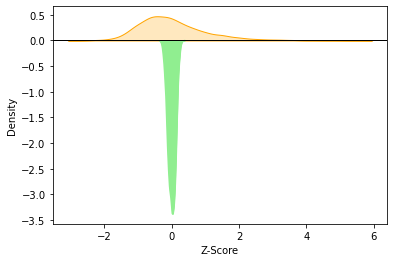

In [56]:
#Model 1:
df["zscore_BMXHIP_1"] = ((df["BMXHIP_1"])-(df["mean_BMXHIP"]))/(df["sd_BMXHIP"])
df["mean_zscore_BMXHIP_1"] = statistics.mean(df["zscore_BMXHIP_1"])
print("Mean Z-score BMXHIP 1: ", df["mean_zscore_BMXHIP_1"])

#Graph:
sns.kdeplot(df["zscore_BMXHIP"], shade=True, color="orange")
kde = gaussian_kde(df["zscore_BMXHIP_1"])
x_range = linspace(min(df["zscore_BMXHIP_1"]), max(df["zscore_BMXHIP_1"]), len(df["zscore_BMXHIP_1"]))
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='lightgreen') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='lightgreen')
plt.xlabel("Z-Score")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')
plt.show()

Mean Z-score BMXHIP 2:  0       4.557228e-09
1       4.557228e-09
2       4.557228e-09
3       4.557228e-09
4       4.557228e-09
            ...     
9798    4.557228e-09
9799    4.557228e-09
9800    4.557228e-09
9801    4.557228e-09
9802    4.557228e-09
Name: mean_zscore_BMXHIP_2, Length: 9803, dtype: float64


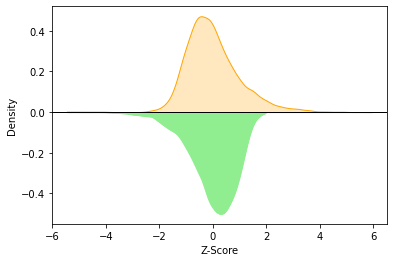

In [57]:
#Model 2:
df["zscore_BMXHIP_2"] = ((df["BMXHIP_2"])-(df["mean_BMXHIP"]))/(df["sd_BMXHIP"])
df["mean_zscore_BMXHIP_2"] = statistics.mean(df["zscore_BMXHIP_2"])
print("Mean Z-score BMXHIP 2: ", df["mean_zscore_BMXHIP_2"])
#
#Graph:
sns.kdeplot(df["zscore_BMXHIP"], shade=True, color="orange")
kde = gaussian_kde(df["zscore_BMXHIP_2"])
x_range = linspace(min(df["zscore_BMXHIP_2"]), max(df["zscore_BMXHIP_2"]), len(df["zscore_BMXHIP_2"]))
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='lightgreen') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='lightgreen')
plt.xlabel("Z-Score")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')
plt.show()